In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dropout, LeakyReLU
from keras.optimizers import Adam

In [5]:
solar_data= pd.read_csv('C:/Users/ucbab/Downloads/archive/solar_inverter_measurements_March_2024.csv')

In [6]:
print(solar_data.info())
solar_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604799 entries, 0 to 604798
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetimestamp         604799 non-null  object 
 1   datetimestampseconds  604799 non-null  int64  
 2   AphA                  604799 non-null  float64
 3   Hz                    604799 non-null  float64
 4   PF                    604799 non-null  float64
 5   PhVphA                604799 non-null  float64
 6   VA                    604799 non-null  float64
 7   VAr                   604799 non-null  float64
 8   W                     604799 non-null  float64
 9   DCV                   604799 non-null  float64
 10  DCA                   604799 non-null  float64
 11  DCW                   604799 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 55.4+ MB
None


,datetimestamp,datetimestampseconds,AphA,Hz,PF,PhVphA,VA,VAr,W,DCV,DCA,DCW
0,3/17/2024 0:00,1710633600,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
1,3/17/2024 0:00,1710633601,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
2,3/17/2024 0:00,1710633602,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
3,3/17/2024 0:00,1710633603,0.160,59.990,100.0,236.90,21.0,0.0,21.0,269.50,0.12,32.340
4,3/17/2024 0:00,1710633604,0.155,59.985,100.0,236.95,20.0,0.0,20.0,311.70,0.11,34.287


In [7]:
solar_data.head(20)

,datetimestamp,datetimestampseconds,AphA,Hz,PF,PhVphA,VA,VAr,W,DCV,DCA,DCW
0,3/17/2024 0:00,1710633600,0.160,59.990,100.0,236.900,18.000,0.0,18.000,262.35,0.16,41.976
1,3/17/2024 0:00,1710633601,0.160,59.990,100.0,236.900,18.000,0.0,18.000,262.35,0.16,41.976
2,3/17/2024 0:00,1710633602,0.160,59.990,100.0,236.900,18.000,0.0,18.000,262.35,0.16,41.976
3,3/17/2024 0:00,1710633603,0.160,59.990,100.0,236.900,21.000,0.0,21.000,269.50,0.12,32.340
4,3/17/2024 0:00,1710633604,0.155,59.985,100.0,236.950,20.000,0.0,20.000,311.70,0.11,34.287
5,3/17/2024 0:00,1710633605,0.150,59.980,100.0,237.000,18.000,0.0,18.000,311.70,0.11,34.287
6,3/17/2024 0:00,1710633606,0.150,59.980,100.0,237.000,18.000,0.0,18.000,301.15,0.13,39.149
7,3/17/2024 0:00,1710633607,0.150,59.980,100.0,237.000,20.000,0.0,20.000,301.15,0.13,39.149
8,3/17/2024 0:00,1710633608,0.150,59.980,100.0,236.900,18.000,0.0,18.000,301.15,0.13,39.149
9,3/17/2024 0:00,1710633609,0.150,59.980,100.0,236.900,18.000,0.0,18.000,273.75,0.11,30.112


In [8]:
solar_data.shape

(604799, 12)

In [9]:
solar_data.describe()

,datetimestampseconds,AphA,Hz,PF,PhVphA,VA,VAr,W,DCV,DCA,DCW
count,6.047990e+05,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000
mean,1.710936e+09,8.930898,30.141278,30.026395,119.944340,2146.417949,4.962261,2139.735070,190.314730,5.977347,2206.083361
std,1.745906e+05,13.745224,29.996440,95.343562,119.381241,3322.463418,8.815379,3314.311493,180.206522,9.294987,3408.940342
min,1.710634e+09,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710785e+09,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,2.800000,0.000000,0.000000
50%,1.710936e+09,0.160000,59.950000,100.000000,232.900000,2.000000,0.000000,2.000000,306.750000,0.070000,19.667000
75%,1.711087e+09,14.833000,59.990000,100.000000,238.600000,3548.005500,6.000000,3538.000000,367.950000,9.700000,3641.028000
max,1.711238e+09,61.310000,60.040000,100.000000,270.000000,14894.062000,45.000000,14894.000000,428.700000,42.630000,15397.956000


In [10]:
solar_data.isnull().sum()

datetimestamp           0
datetimestampseconds    0
AphA                    0
Hz                      0
PF                      0
PhVphA                  0
VA                      0
VAr                     0
W                       0
DCV                     0
DCA                     0
DCW                     0
dtype: int64

In [11]:
#converting the date columns to datetime format
solar_data['datetimestamp']= pd.to_datetime(solar_data['datetimestamp'], errors = 'coerce')
solar_data['datetimestampseconds'] = pd.to_datetime(solar_data['datetimestampseconds'], unit = 's')

In [12]:
print(solar_data[['datetimestamp', 'datetimestampseconds']].head())

  datetimestamp datetimestampseconds
0    2024-03-17  2024-03-17 00:00:00
1    2024-03-17  2024-03-17 00:00:01
2    2024-03-17  2024-03-17 00:00:02
3    2024-03-17  2024-03-17 00:00:03
4    2024-03-17  2024-03-17 00:00:04


In [13]:
#removing datetiestamp since datetimestampseconds gives a more comprehensive time
solar_data.rename(columns={'datetimestampseconds': 'timestamp'}, inplace=True)
solar_data.drop(columns = ['datetimestamp'], inplace=True)

In [14]:
solar_data

,timestamp,AphA,Hz,PF,PhVphA,VA,VAr,W,DCV,DCA,DCW
0,2024-03-17 00:00:00,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
1,2024-03-17 00:00:01,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
2,2024-03-17 00:00:02,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
3,2024-03-17 00:00:03,0.160,59.990,100.0,236.90,21.0,0.0,21.0,269.50,0.12,32.340
4,2024-03-17 00:00:04,0.155,59.985,100.0,236.95,20.0,0.0,20.0,311.70,0.11,34.287
...,...,...,...,...,...,...,...,...,...,...,...
604794,2024-03-23 23:59:54,0.250,60.000,100.0,237.20,46.0,0.0,46.0,333.65,0.24,80.076
604795,2024-03-23 23:59:55,0.255,60.000,100.0,237.20,47.0,0.0,47.0,311.15,0.27,84.010
604796,2024-03-23 23:59:56,0.260,60.000,100.0,237.20,48.0,0.0,48.0,311.15,0.27,84.010
604797,2024-03-23 23:59:57,0.260,60.000,100.0,237.20,48.0,0.0,48.0,311.15,0.27,84.010


In [15]:
#setting timestamp as the index column
solar_data.set_index('timestamp', inplace=True)
solar_data

,AphA,Hz,PF,PhVphA,VA,VAr,W,DCV,DCA,DCW
timestamp,,,,,,,,,,
2024-03-17 00:00:00,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
2024-03-17 00:00:01,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
2024-03-17 00:00:02,0.160,59.990,100.0,236.90,18.0,0.0,18.0,262.35,0.16,41.976
2024-03-17 00:00:03,0.160,59.990,100.0,236.90,21.0,0.0,21.0,269.50,0.12,32.340
2024-03-17 00:00:04,0.155,59.985,100.0,236.95,20.0,0.0,20.0,311.70,0.11,34.287
...,...,...,...,...,...,...,...,...,...,...
2024-03-23 23:59:54,0.250,60.000,100.0,237.20,46.0,0.0,46.0,333.65,0.24,80.076
2024-03-23 23:59:55,0.255,60.000,100.0,237.20,47.0,0.0,47.0,311.15,0.27,84.010
2024-03-23 23:59:56,0.260,60.000,100.0,237.20,48.0,0.0,48.0,311.15,0.27,84.010


In [16]:
print(solar_data['AphA'].head())
print(solar_data['AphA'].describe())

timestamp
2024-03-17 00:00:00    0.160
2024-03-17 00:00:01    0.160
2024-03-17 00:00:02    0.160
2024-03-17 00:00:03    0.160
2024-03-17 00:00:04    0.155
Name: AphA, dtype: float64
count    604799.000000
mean          8.930898
std          13.745224
min           0.000000
25%           0.000000
50%           0.160000
75%          14.833000
max          61.310000
Name: AphA, dtype: float64


C:\Users\ucbab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


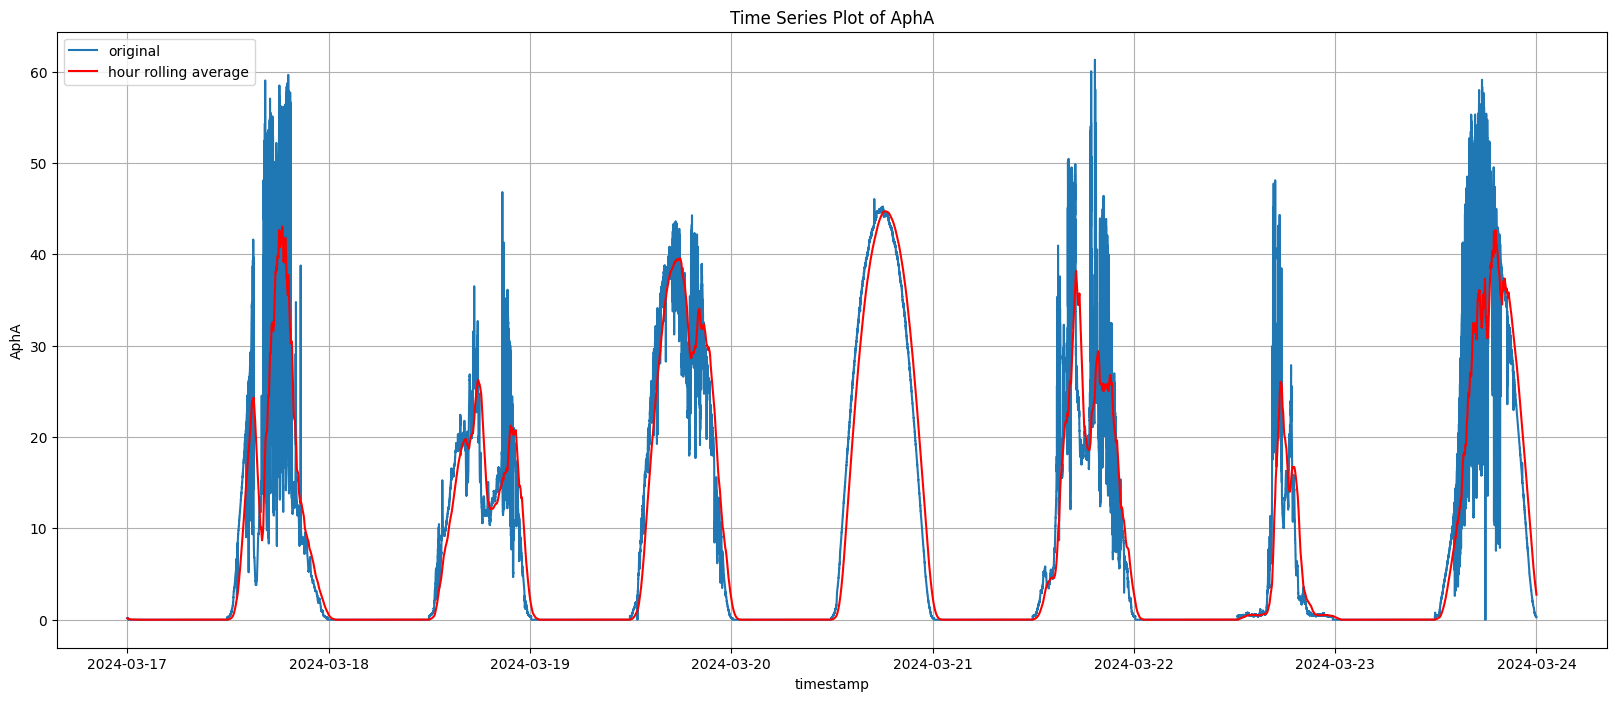

<Figure size 640x480 with 0 Axes>

In [17]:
#specifying a 1 hour window to visualize the apha column every one minute
hour_window='3600s'
solar_data['AphA_rolling_minute'] = solar_data['AphA'].rolling(window=hour_window).mean()

plt.figure(figsize= (20,8))
plt.plot(solar_data.index, solar_data['AphA'], label='original')
plt.plot(solar_data.index, solar_data['AphA_rolling_minute'], color='r', label='hour rolling average')
plt.xlabel('timestamp')
plt.ylabel('AphA')
plt.title('Time Series Plot of AphA')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('apha plot.png')

In [18]:
print(solar_data['Hz'].head())
print(solar_data['Hz'].describe())

timestamp
2024-03-17 00:00:00    59.990
2024-03-17 00:00:01    59.990
2024-03-17 00:00:02    59.990
2024-03-17 00:00:03    59.990
2024-03-17 00:00:04    59.985
Name: Hz, dtype: float64
count    604799.000000
mean         30.141278
std          29.996440
min           0.000000
25%           0.000000
50%          59.950000
75%          59.990000
max          60.040000
Name: Hz, dtype: float64


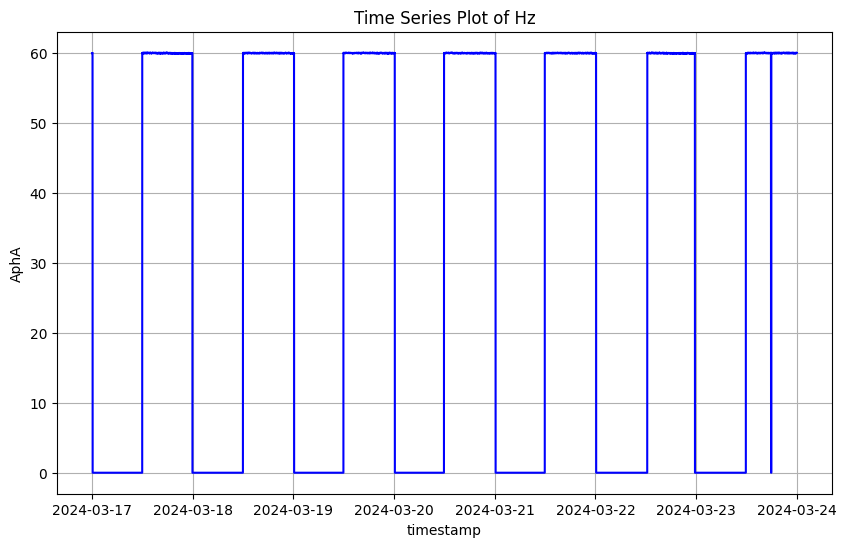

In [19]:
plt.figure(figsize= (10,6))
plt.plot(solar_data.index, solar_data['Hz'], color='b')
plt.xlabel('timestamp')
plt.ylabel('AphA')
plt.title('Time Series Plot of Hz')
plt.grid(True)
plt.show()

In [20]:
print(solar_data['PF'].head())
print(solar_data['PF'].describe())

timestamp
2024-03-17 00:00:00    100.0
2024-03-17 00:00:01    100.0
2024-03-17 00:00:02    100.0
2024-03-17 00:00:03    100.0
2024-03-17 00:00:04    100.0
Name: PF, dtype: float64
count    604799.000000
mean         30.026395
std          95.343562
min        -100.000000
25%        -100.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: PF, dtype: float64


In [21]:
print(solar_data['PF'].sample(25))

timestamp
2024-03-18 13:25:57   -100.0
2024-03-23 04:27:25    100.0
2024-03-20 00:24:09    100.0
2024-03-23 05:51:56    100.0
2024-03-20 10:23:54    100.0
2024-03-21 20:33:15   -100.0
2024-03-22 09:50:30    100.0
2024-03-17 23:46:44    100.0
2024-03-23 01:48:49    100.0
2024-03-21 14:15:54    100.0
2024-03-20 05:01:17    100.0
2024-03-19 18:56:03   -100.0
2024-03-19 01:40:30    100.0
2024-03-23 03:23:30    100.0
2024-03-18 05:13:17    100.0
2024-03-19 11:16:01    100.0
2024-03-23 02:08:13    100.0
2024-03-23 17:43:38   -100.0
2024-03-18 10:14:14    100.0
2024-03-20 22:02:37   -100.0
2024-03-17 06:18:49    100.0
2024-03-19 07:22:41    100.0
2024-03-22 09:15:00    100.0
2024-03-19 17:54:04   -100.0
2024-03-17 08:30:15    100.0
Name: PF, dtype: float64


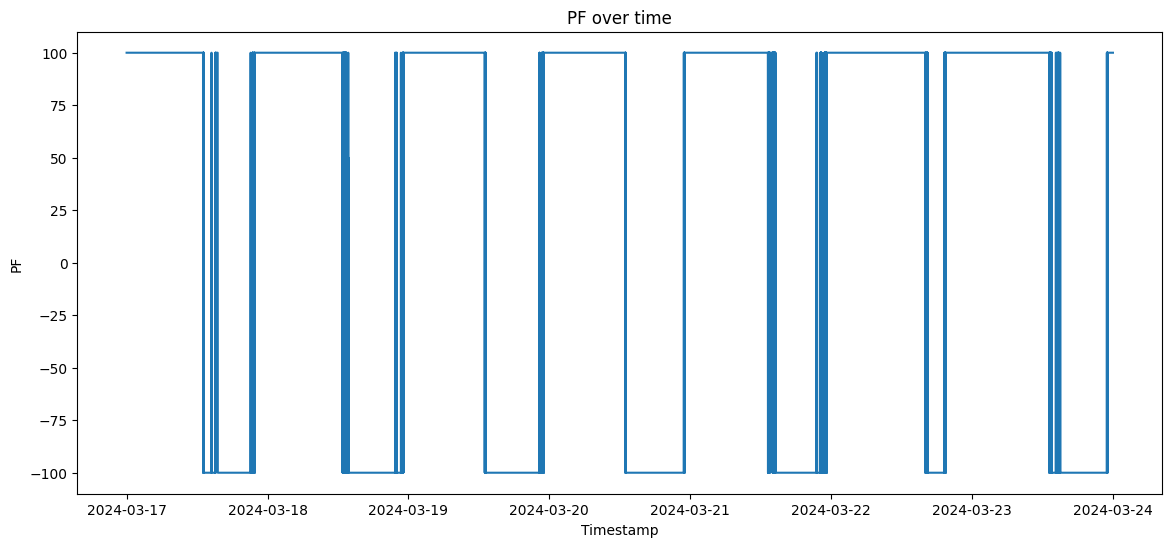

In [22]:
#checking the pf values over time
plt.figure(figsize=(14,6))
plt.plot(solar_data.index, solar_data['PF'])
plt.xlabel('Timestamp')
plt.ylabel('PF')
plt.title('PF over time')
plt.show()

In [23]:
#analysing phase voltage
print(solar_data['PhVphA'].head())
print(solar_data['PhVphA'].describe())

timestamp
2024-03-17 00:00:00    236.90
2024-03-17 00:00:01    236.90
2024-03-17 00:00:02    236.90
2024-03-17 00:00:03    236.90
2024-03-17 00:00:04    236.95
Name: PhVphA, dtype: float64
count    604799.000000
mean        119.944340
std         119.381241
min           0.000000
25%           0.000000
50%         232.900000
75%         238.600000
max         270.000000
Name: PhVphA, dtype: float64


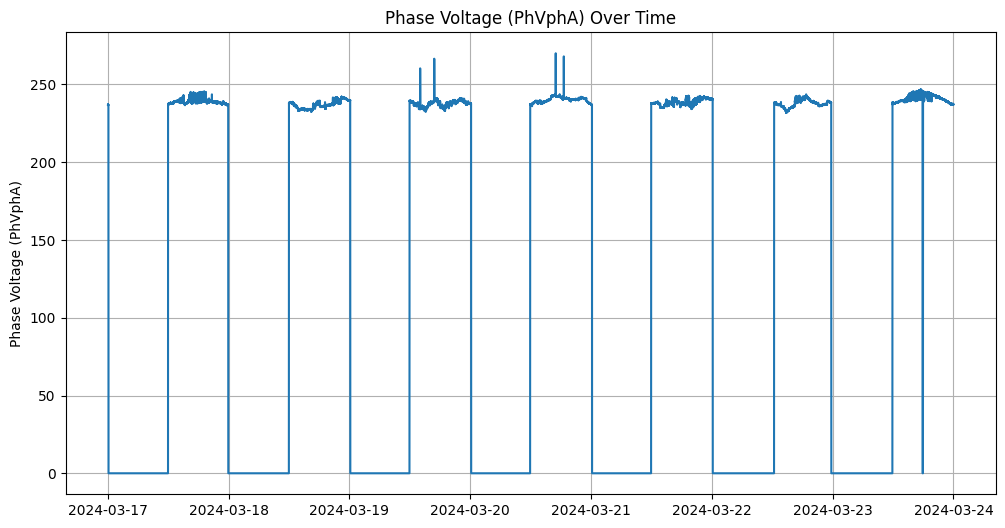

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['PhVphA'])
plt.ylabel('Phase Voltage (PhVphA)')
plt.title('Phase Voltage (PhVphA) Over Time')
plt.grid(True)
plt.show()

In [25]:
#VA column
print(solar_data['VA'].head())
print(solar_data['VA'].describe())

timestamp
2024-03-17 00:00:00    18.0
2024-03-17 00:00:01    18.0
2024-03-17 00:00:02    18.0
2024-03-17 00:00:03    21.0
2024-03-17 00:00:04    20.0
Name: VA, dtype: float64
count    604799.000000
mean       2146.417949
std        3322.463418
min           0.000000
25%           0.000000
50%           2.000000
75%        3548.005500
max       14894.062000
Name: VA, dtype: float64


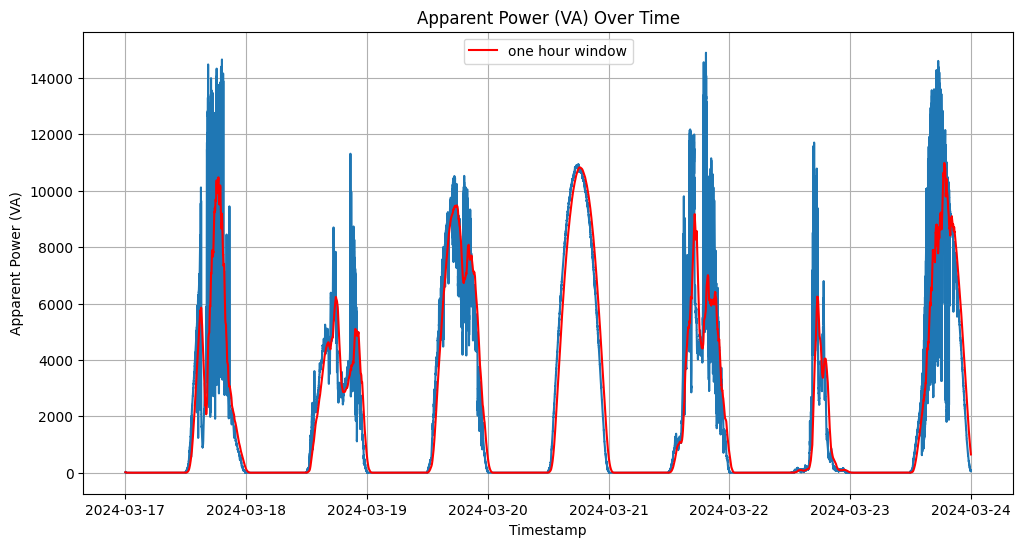

In [26]:
#specifying a 1 hour window to visualize the VA column every one minute
hour_window='1h'
solar_data['VA_rolling_minute'] = solar_data['VA'].rolling(window=hour_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['VA'])
plt.plot(solar_data.index,solar_data['VA_rolling_minute'], color='r', label='one hour window')
plt.xlabel('Timestamp')
plt.ylabel('Apparent Power (VA)')
plt.title('Apparent Power (VA) Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print(solar_data['VAr'].head())
print(solar_data['VAr'].describe())

timestamp
2024-03-17 00:00:00    0.0
2024-03-17 00:00:01    0.0
2024-03-17 00:00:02    0.0
2024-03-17 00:00:03    0.0
2024-03-17 00:00:04    0.0
Name: VAr, dtype: float64
count    604799.000000
mean          4.962261
std           8.815379
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max          45.000000
Name: VAr, dtype: float64


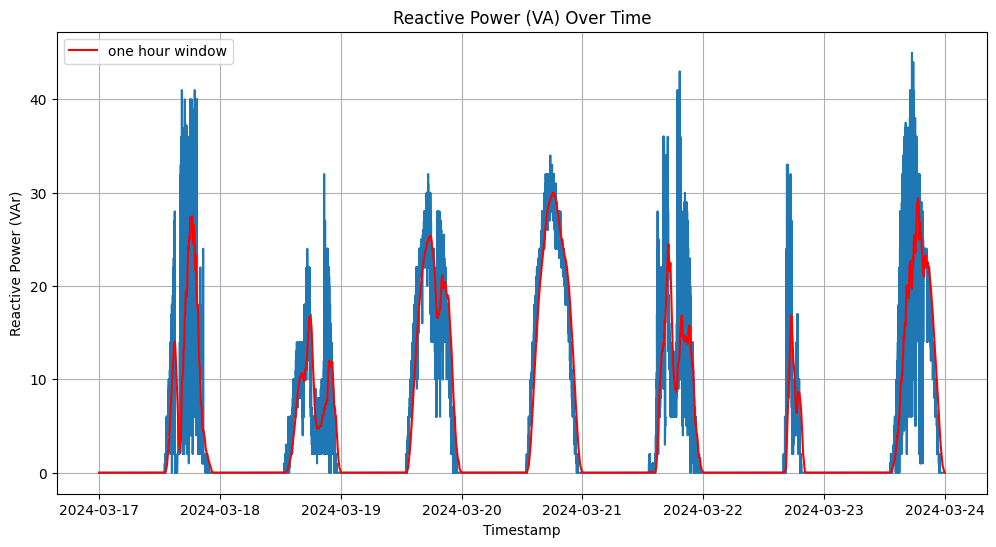

In [28]:
#specifying a 1 hour window to visualize the VA column every one minute
hour_window='1h'
solar_data['VAr_rolling_minute'] = solar_data['VAr'].rolling(window=hour_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['VAr'])
plt.plot(solar_data.index,solar_data['VAr_rolling_minute'], color='r', label='one hour window')
plt.xlabel('Timestamp')
plt.ylabel('Reactive Power (VAr)')
plt.title('Reactive Power (VA) Over Time')
plt.legend()
plt.grid(True)
plt.show()

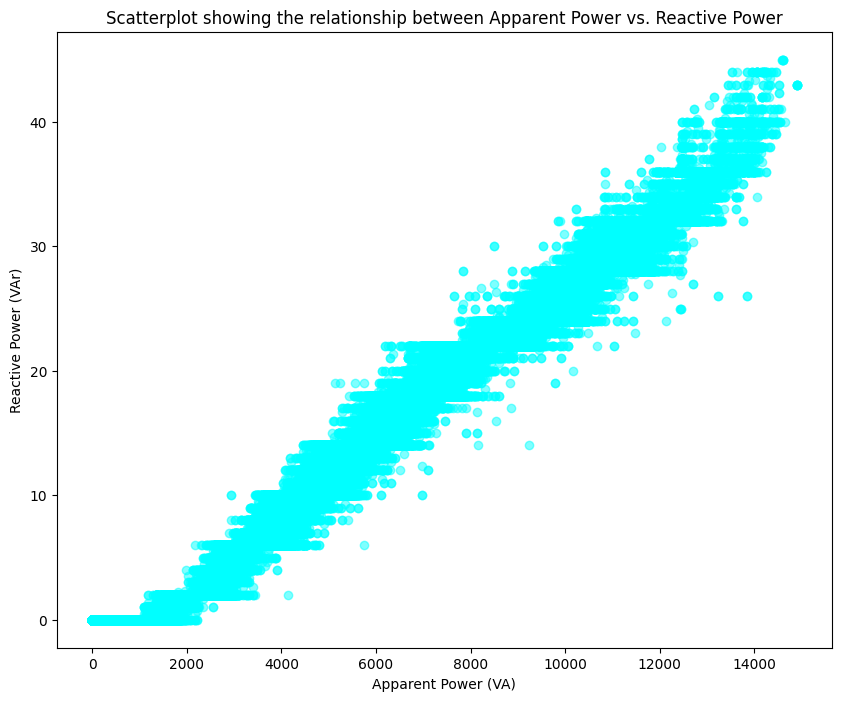

In [29]:
#scatterplot visualizing the relationship between apparent power and reactive power
plt.figure(figsize=(10, 8))
plt.scatter(solar_data['VA'], solar_data['VAr'], alpha=0.5, color='cyan')
plt.xlabel('Apparent Power (VA)')
plt.ylabel('Reactive Power (VAr)')
plt.title('Scatterplot showing the relationship between Apparent Power vs. Reactive Power')
plt.show()

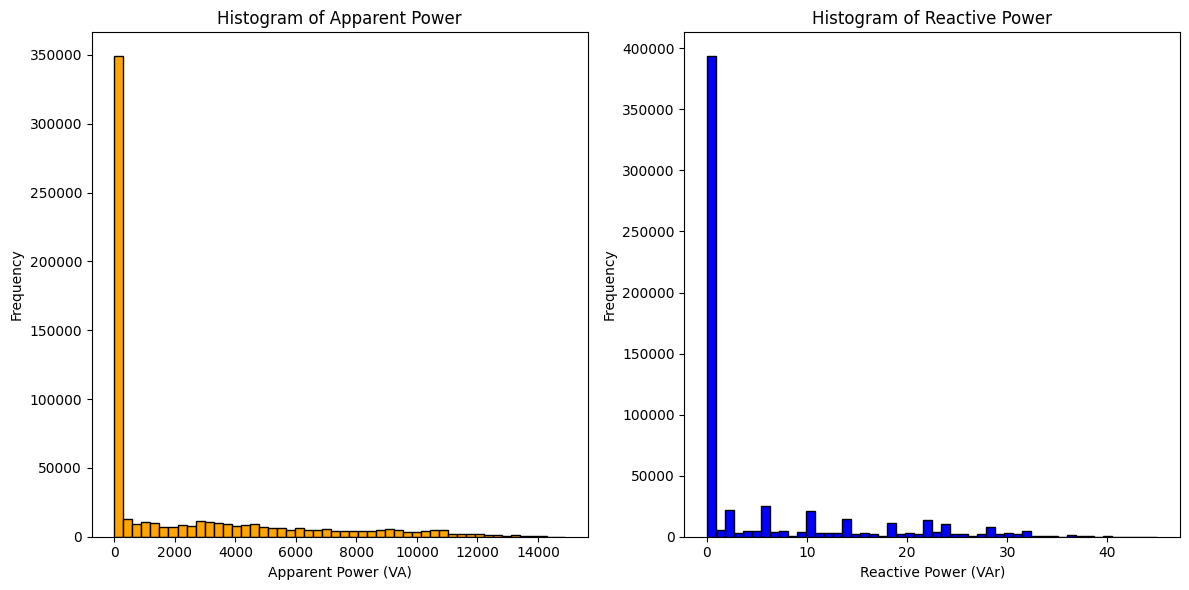

In [30]:
plt.figure(figsize=(12, 6))

# Apparent Power Histogram
plt.subplot(1, 2, 1)
plt.hist(solar_data['VA'], bins=50, color='orange', edgecolor='black')
plt.xlabel('Apparent Power (VA)')
plt.ylabel('Frequency')
plt.title('Histogram of Apparent Power')

# Reactive Power Histogram
plt.subplot(1, 2, 2)
plt.hist(solar_data['VAr'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Reactive Power (VAr)')
plt.ylabel('Frequency')
plt.title('Histogram of Reactive Power')

plt.tight_layout()
plt.show()


In [31]:
solar_data['W'].describe()

count    604799.000000
mean       2139.735070
std        3314.311493
min           0.000000
25%           0.000000
50%           2.000000
75%        3538.000000
max       14894.000000
Name: W, dtype: float64

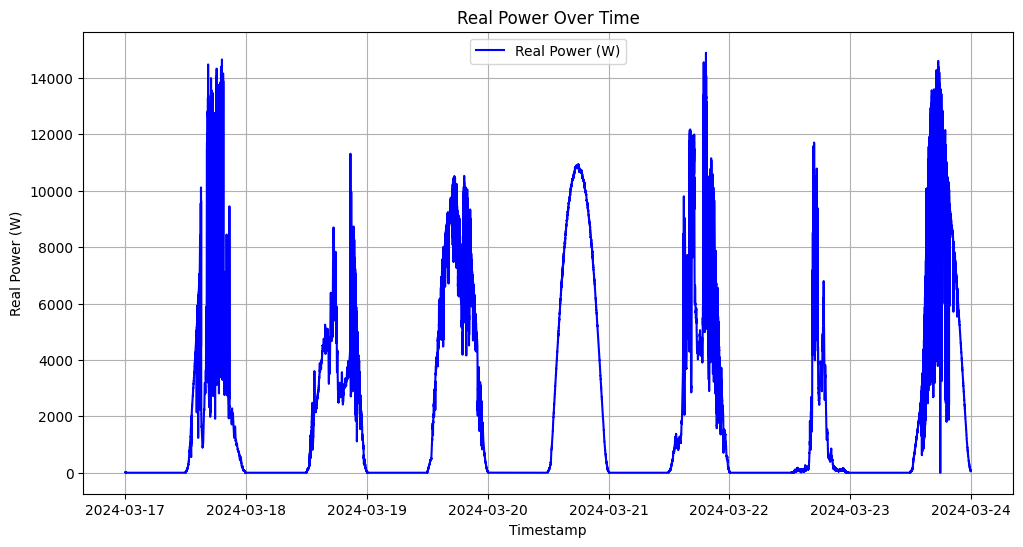

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['W'], color='blue', label='Real Power (W)')
plt.xlabel('Timestamp')
plt.ylabel('Real Power (W)')
plt.title('Real Power Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
correlation_matrix = solar_data[['W', 'VA', 'VAr']].corr()
print(correlation_matrix)


            W        VA       VAr
W    1.000000  0.996244  0.982719
VA   0.996244  1.000000  0.987408
VAr  0.982719  0.987408  1.000000


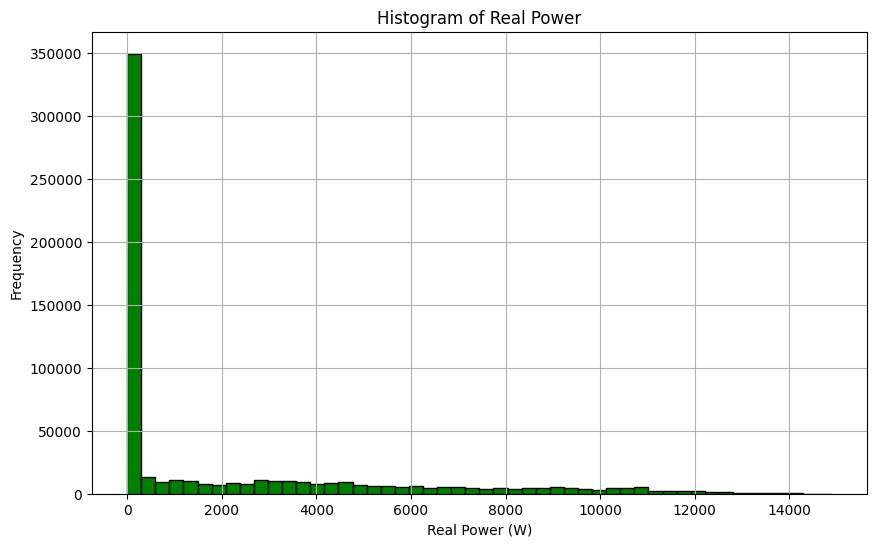

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(solar_data['W'], bins=50, color='green', edgecolor='black')
plt.xlabel('Real Power (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Real Power')
plt.grid(True)
plt.show()


In [35]:
solar_data['DCV'].describe()

count    604799.000000
mean        190.314730
std         180.206522
min           0.000000
25%           2.800000
50%         306.750000
75%         367.950000
max         428.700000
Name: DCV, dtype: float64

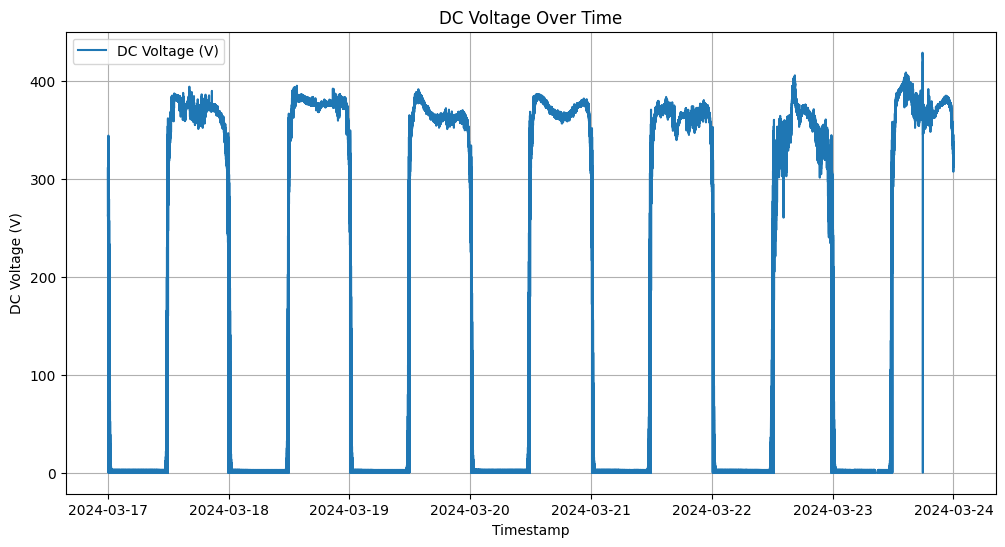

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['DCV'], label='DC Voltage (V)')
plt.xlabel('Timestamp')
plt.ylabel('DC Voltage (V)')
plt.title('DC Voltage Over Time')
plt.grid(True)
plt.legend()
plt.show()


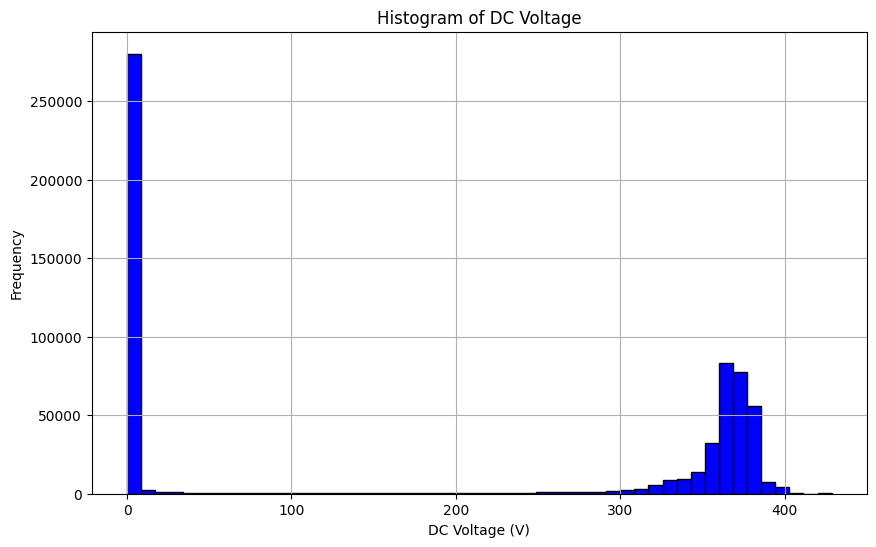

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(solar_data['DCV'], bins=50, color='blue', edgecolor='black')
plt.xlabel('DC Voltage (V)')
plt.ylabel('Frequency')
plt.title('Histogram of DC Voltage')
plt.grid(True)
plt.show()

In [38]:
solar_data['DCA'].describe()


count    604799.000000
mean          5.977347
std           9.294987
min           0.000000
25%           0.000000
50%           0.070000
75%           9.700000
max          42.630000
Name: DCA, dtype: float64

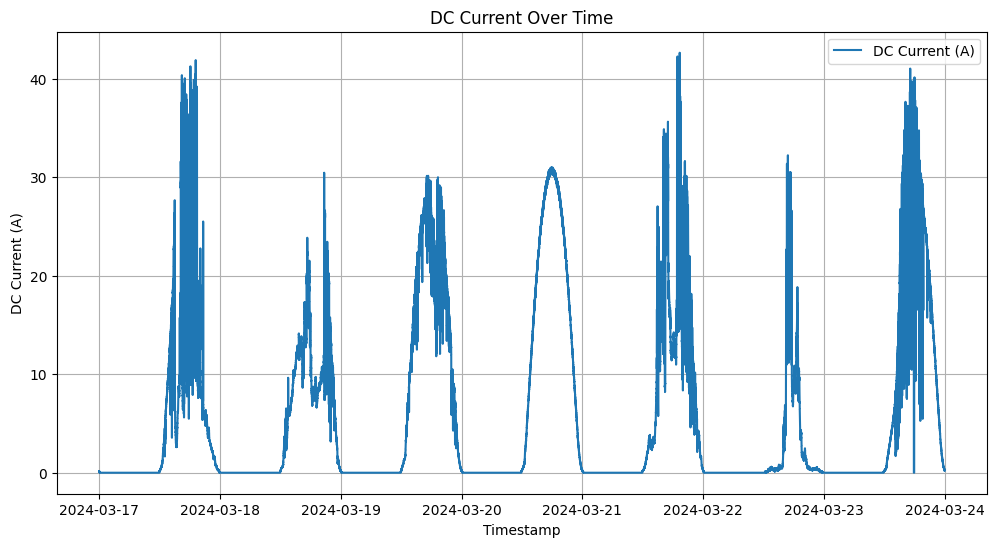

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['DCA'],label='DC Current (A)')
plt.xlabel('Timestamp')
plt.ylabel('DC Current (A)')
plt.title('DC Current Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [40]:
solar_data['DCW'].describe()

count    604799.000000
mean       2206.083361
std        3408.940342
min           0.000000
25%           0.000000
50%          19.667000
75%        3641.028000
max       15397.956000
Name: DCW, dtype: float64

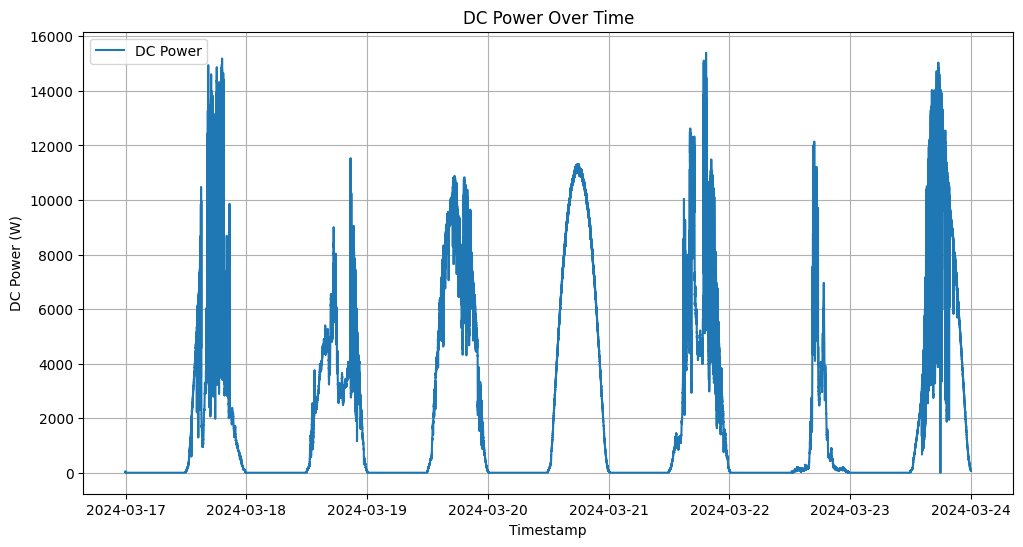

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(solar_data.index, solar_data['DCW'],label='DC Power')
plt.xlabel('Timestamp')
plt.ylabel('DC Power (W)')
plt.title('DC Power Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
solar_data.drop(columns=['AphA_rolling_minute'], inplace=True)

In [43]:
solar_data.drop(columns=['VA_rolling_minute', 'VAr_rolling_minute'], inplace=True)

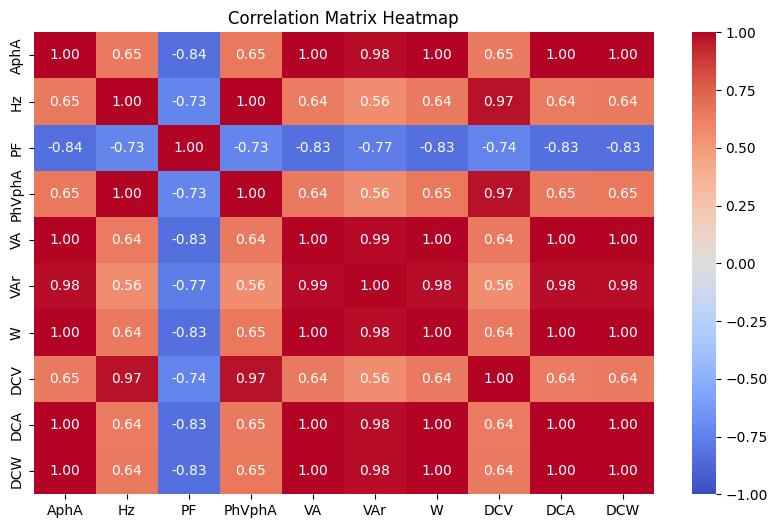

In [44]:
# Calculate the correlation matrix
correlation_matrix = solar_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()